# **Деревья решений. Контрольное задание**

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели дерева решений.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером студента в списке группы в СДО.

Для задачи регрессии.

In [5]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 542,
                       n_features = 2,
                       n_informative = 1,
                       noise = 10.3,
                       random_state = 10)

Разделить выборку на обучающую и тестовую.

Доля объектов в тестовой выборке - 0,3.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 10)

X_train.shape, X_test.shape

((379, 2), (163, 2))

# **2. Обучение модели**

Вычислить количество вопросов, которое необходимо проанализировать в корневом узле дерева решений для его разделения.

In [7]:
2 * len(X_train) - 1

757

Обучить модель дерева решений на тренировочной выборке с гиперпараметрами по умолчанию.

In [8]:
from sklearn.tree import DecisionTreeRegressor
tree_regr = DecisionTreeRegressor()
tree_regr.fit(X_train, y_train)

DecisionTreeRegressor()

Визуализировать полученное дерево.

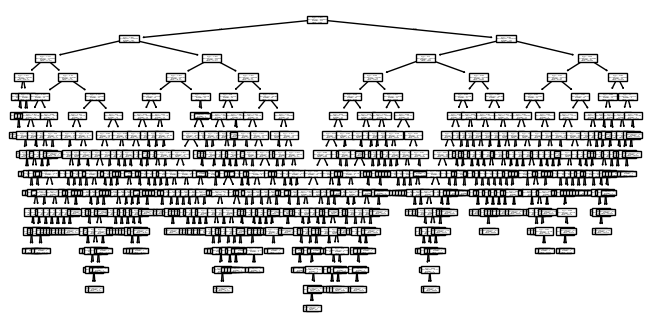

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plot_tree(tree_regr);

Вывести количество уровней (глубину) дерева.

In [11]:
tree_regr.get_depth()

15

Вывести количество листев дерева.

In [18]:
tree_regr.get_n_leaves()

np.int64(379)

Визуализировать полученное дерево с отображением одного уровня.

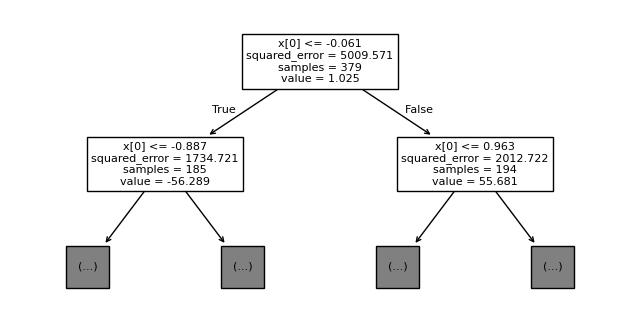

In [14]:
plt.figure(figsize = (8,4))
plot_tree(tree_regr,
          max_depth = 1);


С использованием выражений, рассмотренных в лекции 4, вычислить прирост информации для вопроса, который был выбран в корневом узле.

In [25]:
import numpy as np

def mse(y):
    return np.mean((y - np.mean(y))**2)

def information_gain(y, y_left, y_right):
    n = len(y)
    return mse(y) - (len(y_left)/n)*mse(y_left) - (len(y_right)/n)*mse(y_right)

y = y_train

y_left = y_train[X_train[:, 0] <= -0.0613]
y_right = y_train[X_train[:, 0] > -0.0613]

# Вычисление прироста информации
gain_chosen = information_gain(y, y_left, y_right)
print(f"Прирост информации: {gain_chosen:.4f}")

Прирост информации: 3132.5486


С использованием выражений, рассмотренных в лекции 4, вычислить прирост информации для любого альтернативного вопроса в корневом узле и сравнить полученные значения.

In [24]:
y_left_alt = y_train[X_train[:, 0] <= 0.0]
y_right_alt = y_train[X_train[:, 0] > 0.0]


gain_alternative = information_gain(y, y_left_alt, y_right_alt)
print(f"Прирост информации для альтернативного вопроса: {gain_alternative:.4f}")


print(f"\nСРАВНЕНИЕ:")
print(f"Выбранный вопрос:   {gain_chosen:.4f}")
print(f"Альтернативный:     {gain_alternative:.4f}")
print(f"Разница:           {gain_chosen - gain_alternative:.4f}")

Прирост информации для альтернативного вопроса: 3118.4513

СРАВНЕНИЕ:
Выбранный вопрос:   3132.5486
Альтернативный:     3118.4513
Разница:           14.0973


# **3. Оценивание качества модели**

**Для задачи регрессии**:

Вычислить метрики MSE и R2 для обучающей и тестовой выборок.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = tree_regr.predict(X_train)
y_test_pred = tree_regr.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
R2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
R2_test = r2_score(y_test, y_test_pred)

print(f"Обучающая: \n MSE: {mse_train}, R2: {R2_train} \n Тестовая: \n MSE: {mse_test}, R2: {R2_test}")

Обучающая: 
 MSE: 0.0, R2: 1.0 
 Тестовая: 
 MSE: 165.25168659684843, R2: 0.9629804547659356


Сделать вывод о качестве модели.

# **4. Использование модели для предсказания**

Задать произвольный объект и определить:
- для задачи регрессии - прогнозное значение целевого признака.

In [27]:
X_new = [[ -0.7, 1.4]]
y_new = tree_regr.predict(X_new)
print(y_new)

[-41.67424921]
